In [23]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.12.0


In [24]:
import os
import sys
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras import applications

import visualkeras

%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers

In [25]:
import os

os.environ['KAGGLE_USERNAME'] = "ehsanap"
os.environ['KAGGLE_KEY'] = ""
!kaggle competitions download -c dogs-vs-cats

401 - Unauthorized


In [26]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("dogs-vs-cats.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [27]:
print(os.listdir('/'))

['home', 'usr', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', 'tmp', 'cores']


In [7]:
# Upload data and extract the contents

from zipfile import ZipFile

file_name = "train.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

done


In [28]:
IMAGE_FOLDER_PATH = "train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 150
HEIGHT = 150

In [29]:
FILE_NAMES[0:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [30]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [31]:
dataset.head(10)

,image_path,target
0,train/dog.8011.jpg,dog
1,train/cat.5077.jpg,cat
2,train/dog.7322.jpg,dog
3,train/cat.2718.jpg,cat
4,train/cat.10151.jpg,cat
5,train/cat.3406.jpg,cat
6,train/dog.1753.jpg,dog
7,train/cat.4369.jpg,cat
8,train/cat.7660.jpg,cat
9,train/dog.5535.jpg,dog


In [32]:
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


In [33]:
fig = go.Figure(go.Bar(
    x= target_counts.values,
    y=target_counts.index,
    orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [34]:
fig=px.pie(target_counts.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [35]:
class_id_distributionTrain = dataset['target'].value_counts()
class_id_distributionTrain.head(10)

dog    12500
cat    12500
Name: target, dtype: int64

In [36]:
fig = go.Figure(go.Bar(
    x=class_id_distributionTrain.values,
    y=class_id_distributionTrain.index,
    orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [37]:
fig=px.pie(class_id_distributionTrain.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [38]:
class_id_distributionTest = dataset['target'].value_counts()
class_id_distributionTest.head(10)

dog    12500
cat    12500
Name: target, dtype: int64

In [39]:
fig = go.Figure(go.Bar(
    x=class_id_distributionTest.values,
    y=class_id_distributionTest.index,
    orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [40]:
fig=px.pie(class_id_distributionTrain.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# Model 1

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M2 Max


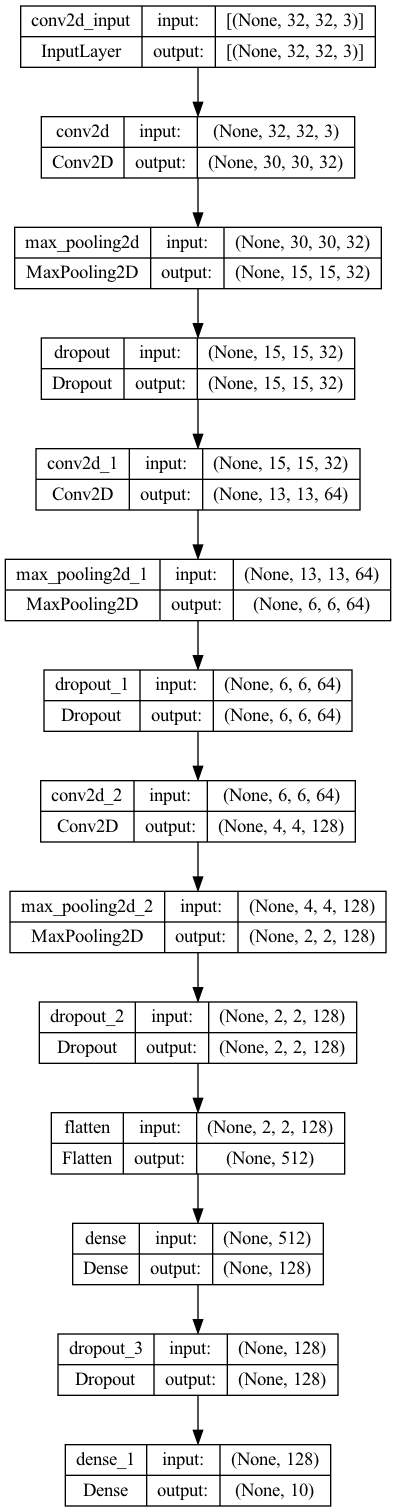

In [27]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)

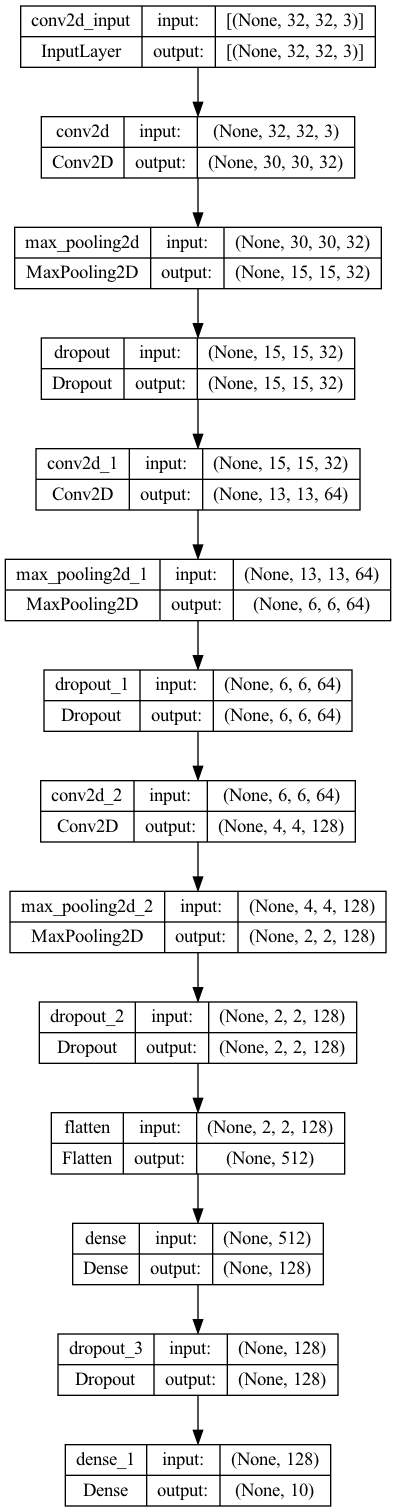

In [28]:
Image(filename='convnet.png')

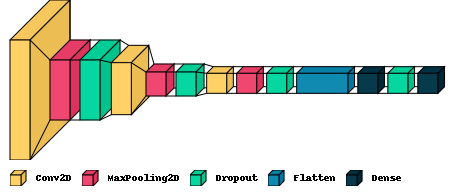

In [29]:
visualkeras.layered_view(model, legend=True)

In [30]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [31]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_datagen.fit(x_train)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen.fit(x_test)
History = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=50,
                    validation_data=test_datagen.flow(x_test, y_test, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    validation_steps=len(x_test) // batch_size)

Epoch 1/50


2023-04-08 23:19:31.436568: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1562/1562 [==============================] - 17s 11ms/step - loss: 1.7104 - accuracy: 0.3653 - val_loss: 1.4058 - val_accuracy: 0.4999
Epoch 2/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.3989 - accuracy: 0.4916 - val_loss: 1.2052 - val_accuracy: 0.5680
Epoch 3/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2840 - accuracy: 0.5396 - val_loss: 1.0846 - val_accuracy: 0.6163
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2202 - accuracy: 0.5656 - val_loss: 1.0309 - val_accuracy: 0.6400
Epoch 5/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1673 - accuracy: 0.5882 - val_loss: 0.9572 - val_accuracy: 0.6663
Epoch 6/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1289 - accuracy: 0.6019 - val_loss: 0.9382 - val_accuracy: 0.6707
Epoch 7/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1020 - accuracy: 0.6127 - val_loss: 0.9206 - val_accura

In [35]:
print("Train Accuracy:{:.3f}".format(History.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(History.history['val_accuracy'][-1]))

Train Accuracy:0.711
Test Accuracy:0.748


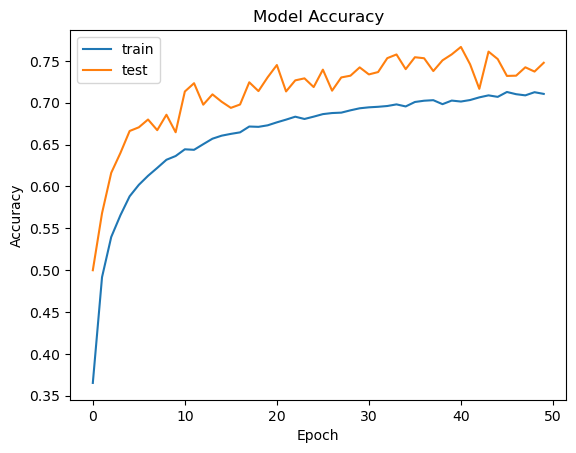

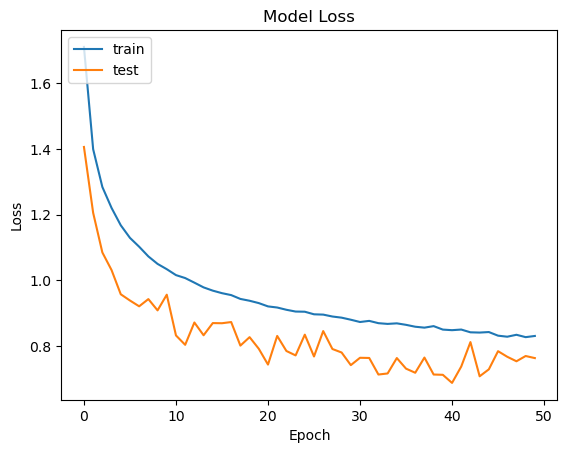

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model 2

In [14]:
def get_side(img, side_type, side_size=5):
    height, width, channel=img.shape
    if side_type=="horizontal":
        return np.ones((height,side_size,  channel), dtype=np.float32)*255
        
    return np.ones((side_size, width,  channel), dtype=np.float32)*255

def show_gallery(show="both"):
    n=100
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state()
    np.random.shuffle(full_paths)
    np.random.set_state(rng_state)
    np.random.shuffle(targets)
    for path, target in zip(full_paths, targets):
        if target!=show and show!="both":
            continue
        counter=counter+1
        if counter%100==0:
            break
        #Image loading from disk as JpegImageFile file format
        img=load_img(path, target_size=(WIDTH,HEIGHT))
        #Converting JpegImageFile to numpy array
        img=img_to_array(img)
        
        hside=get_side(img, side_type="horizontal")
        images.append(img)
        images.append(hside)

        if counter%10==0:
            himage=np.hstack((images))
            vside=get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery=np.vstack((vertical_images)) 
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"both":"Dogs and Cats",
          "cat": "Cats",
          "dog": "Dogs"}
    plt.title("100 samples of {} of the dataset".format(title[show]))
    plt.imshow(gallery.astype(np.uint8))

In [24]:
# from zipfile import ZipFile as zipfile

# show_gallery(show="cat")
# show_gallery(show="dog")
# show_gallery(show="both")

In [18]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 146, 146, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0         
                                                                 
 conv2d_2 (Conv2D)    

In [27]:
model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [28]:
dataset_train, dataset_test=train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)

In [29]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [30]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


In [32]:
modelHistory=model.fit(train_datagenerator,
                                epochs=50,
                                validation_data=test_datagenerator,
                                validation_steps=dataset_test.shape[0]//150,
                                steps_per_epoch=dataset_train.shape[0]//150
                                )

Epoch 1/50
133/133 [==============================] - 72s 540ms/step - loss: 0.8024 - accuracy: 0.5764 - val_loss: 0.7211 - val_accuracy: 0.5044
Epoch 2/50
133/133 [==============================] - 71s 535ms/step - loss: 0.6871 - accuracy: 0.6066 - val_loss: 0.7145 - val_accuracy: 0.5113
Epoch 3/50
133/133 [==============================] - 71s 530ms/step - loss: 0.6296 - accuracy: 0.6536 - val_loss: 1.1445 - val_accuracy: 0.5103
Epoch 4/50
133/133 [==============================] - 71s 531ms/step - loss: 0.5922 - accuracy: 0.6852 - val_loss: 0.8904 - val_accuracy: 0.6067
Epoch 5/50
133/133 [==============================] - 71s 534ms/step - loss: 0.5577 - accuracy: 0.7145 - val_loss: 0.6384 - val_accuracy: 0.7111
Epoch 6/50
133/133 [==============================] - 71s 534ms/step - loss: 0.5308 - accuracy: 0.7339 - val_loss: 0.6379 - val_accuracy: 0.7255
Epoch 7/50
133/133 [==============================] - 71s 533ms/step - loss: 0.5067 - accuracy: 0.7508 - val_loss: 1.0628 - val_ac

Train Accuracy:0.920
Test Accuracy:0.920


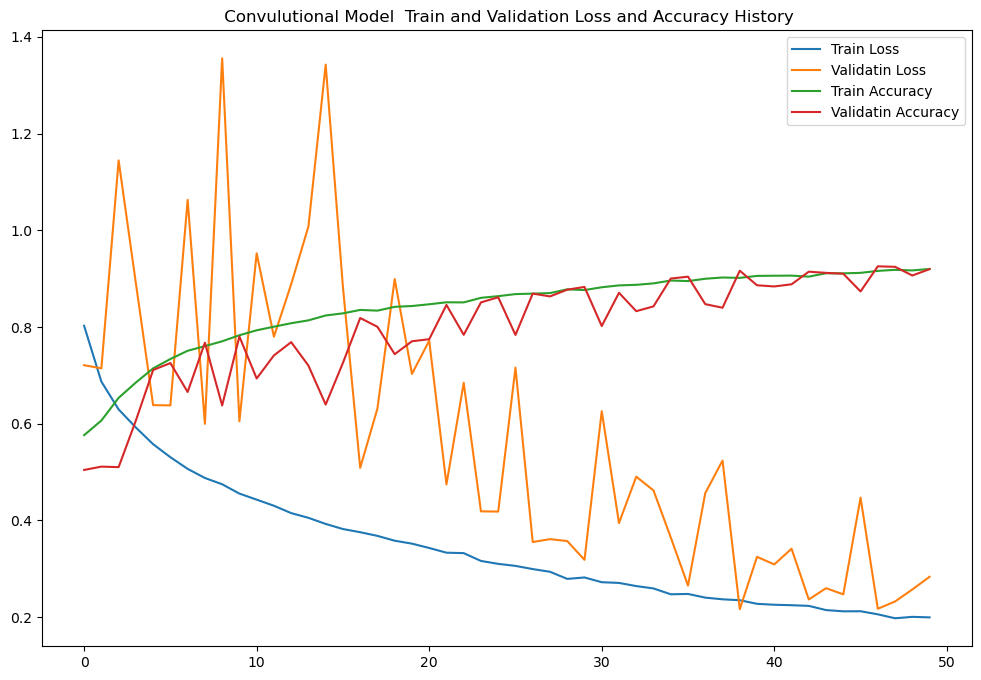

In [33]:
print("Train Accuracy:{:.3f}".format(modelHistory.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(modelHistory.history['val_accuracy'][-1]))
show_model_history(modelHistory=modelHistory, model_name="")

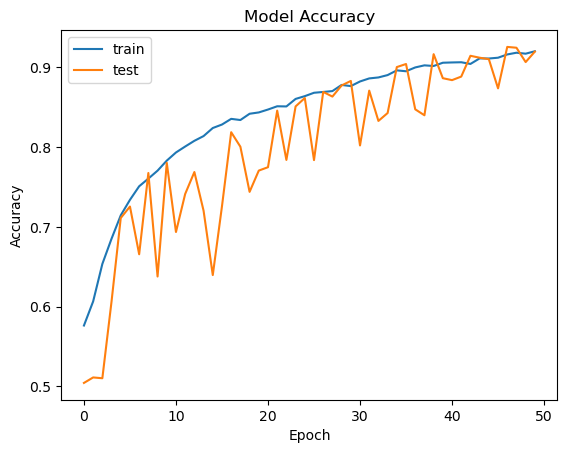

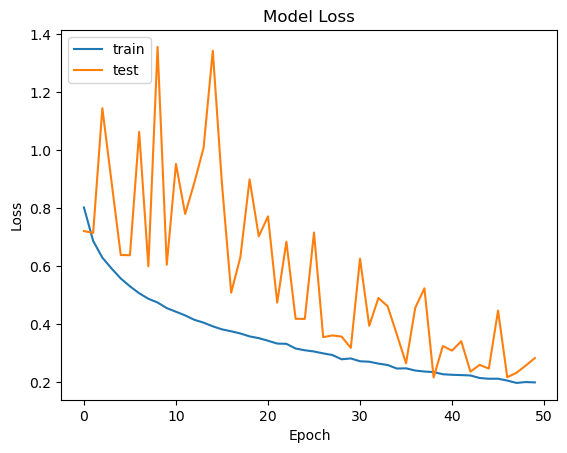

In [148]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model 3

In [41]:
from PIL import Image
import matplotlib.image as mpimg

# Resizing all the images

In [51]:
#creating a directory for resized images
import os
# os.mkdir('resized_image')

In [58]:
original_folder = 'train/'
resized_folder = 'resized_image/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

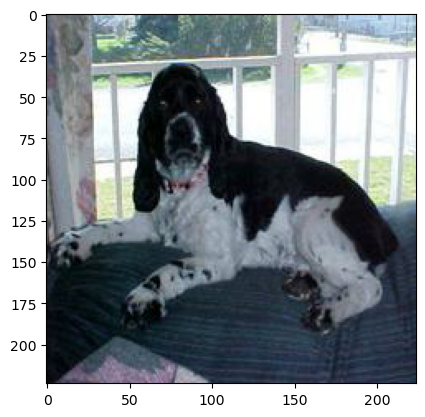

In [59]:
# display resized dog image
import matplotlib.pyplot as plt

img = mpimg.imread('resized_image/dog.7082.jpg')
imgplt = plt.imshow(img)
plt.show()

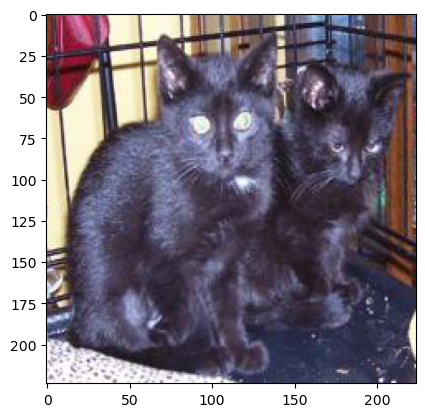

In [60]:
# display resized cat image
img = mpimg.imread('resized_image/cat.9466.jpg')
imgplt = plt.imshow(img)
plt.show()

# Creating labels for resized images of dogs and cats

In [61]:
# creaing a for loop to assign labels
filenames = os.listdir('resized_image/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [62]:
print(filenames[0:5])
print(len(filenames))

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg']
2000


In [63]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
2000


In [64]:
# counting the images of dogs and cats out of 2000 images
import numpy as np

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


# Converting all the resized images to numpy arrays

In [65]:
import cv2
import glob

In [66]:
image_directory = 'resized_image/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [67]:
print(dog_cat_images)

[[[[ 53  36  23]
   [ 43  26  13]
   [ 50  34  18]
   ...
   [231 190 165]
   [232 192 167]
   [233 193 168]]

  [[ 49  32  19]
   [ 39  22   9]
   [ 45  28  15]
   ...
   [232 191 166]
   [233 193 168]
   [234 194 169]]

  [[ 45  27  16]
   [ 36  18   7]
   [ 43  25  14]
   ...
   [231 190 165]
   [233 192 169]
   [232 194 170]]

  ...

  [[ 58  32  26]
   [ 62  36  29]
   [ 64  41  33]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 60  34  28]
   [ 60  36  30]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 56  29  25]
   [ 55  29  23]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]]


 [[[154 119  53]
   [149 114  41]
   [147 112  32]
   ...
   [172 115  46]
   [184 118  37]
   [194 123  36]]

  [[159 123  59]
   [152 116  46]
   [148 113  33]
   ...
   [178 119  49]
   [185 119  38]
   [193 122  34]]

  [[162 125  63]
   [154 117  49]
   [150 114  38]
   ...
   [181 124  49]
   [185 120  35]
   [192 122

In [68]:
type(dog_cat_images)

numpy.ndarray

In [69]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [70]:
X = dog_cat_images
Y = np.asarray(labels)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [73]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [74]:
print(X_train_scaled)

[[[[0.5372549  0.54117647 0.59607843]
   [0.49411765 0.50196078 0.54509804]
   [0.45882353 0.4745098  0.51764706]
   ...
   [0.46666667 0.5372549  0.56470588]
   [0.45098039 0.51764706 0.55294118]
   [0.44313725 0.50588235 0.55294118]]

  [[0.53333333 0.5372549  0.59215686]
   [0.49803922 0.50588235 0.54901961]
   [0.4627451  0.47843137 0.52156863]
   ...
   [0.4627451  0.53333333 0.56078431]
   [0.45490196 0.52156863 0.55686275]
   [0.45490196 0.51764706 0.56470588]]

  [[0.52941176 0.53333333 0.58823529]
   [0.50196078 0.50980392 0.55294118]
   [0.47058824 0.48627451 0.52941176]
   ...
   [0.47058824 0.53333333 0.56078431]
   [0.4627451  0.52941176 0.56470588]
   [0.46666667 0.53333333 0.56862745]]

  ...

  [[0.61176471 0.6627451  0.65490196]
   [0.61176471 0.66666667 0.65882353]
   [0.61960784 0.67058824 0.6627451 ]
   ...
   [0.61176471 0.6745098  0.67058824]
   [0.61176471 0.6745098  0.67058824]
   [0.61568627 0.67843137 0.6745098 ]]

  [[0.63529412 0.67843137 0.66666667]
   [0.6

# Building the Neural Network

In [75]:
import tensorflow as tf
import tensorflow_hub as hub

In [76]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [77]:
num_of_classes = 2

model_3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [78]:
model_3.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
history_3=model_3.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


2023-04-10 00:22:30.128307: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 17s 255ms/step - loss: 0.1814 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 14s 272ms/step - loss: 0.0646 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 13s 268ms/step - loss: 0.0492 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 14s 273ms/step - loss: 0.0402 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 14s 275ms/step - loss: 0.0310 - acc: 0.9925


In [44]:
score_3, acc_3 = model_3.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score_3)
print('Test Accuracy =', acc_3)

13/13 [==============================] - 4s 272ms/step - loss: 0.0559 - acc: 0.9800
Test Loss = 0.055878184735774994
Test Accuracy = 0.9800000190734863


In [46]:
# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.plot(history_3.history['acc'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

# # Plot loss
# plt.plot(history_3.history['loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
40/40 [==============================] - 14s 334ms/step - loss: 0.1724 - acc: 0.9445 - val_loss: 0.0755 - val_acc: 0.9812
Epoch 2/5
40/40 [==============================] - 12s 291ms/step - loss: 0.0768 - acc: 0.9680 - val_loss: 0.0647 - val_acc: 0.9781
Epoch 3/5
40/40 [==============================] - 12s 299ms/step - loss: 0.0527 - acc: 0.9859 - val_loss: 0.0727 - val_acc: 0.9719
Epoch 4/5
40/40 [=======================

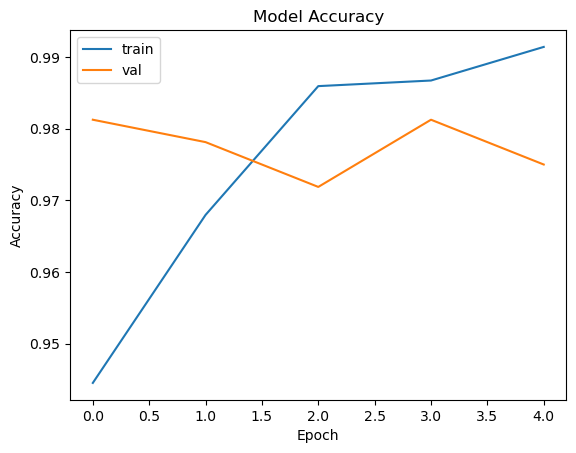

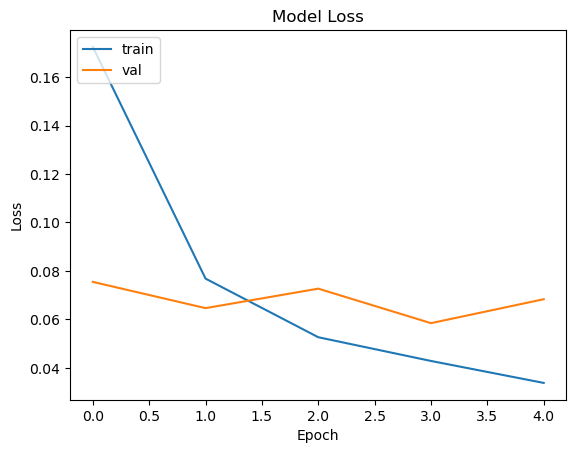

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Define the number of classes
num_of_classes = 2

# Define the model architecture
model_3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

# Print the model summary
model_3.summary()

# Compile the model
model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

# Train the model with validation
history_3 = model_3.fit(
    X_train, Y_train,
    epochs=5,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the test data
score_3, acc_3 = model_3.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score_3)
print('Test Accuracy =', acc_3)

# Plot accuracy
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [80]:
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


In [81]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [82]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_df['category'] = train_df['category'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "train",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.


In [83]:
validate_df['category'] = validate_df['category'].astype(str)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


In [86]:
# fine-tune the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5
1406/1406 [==============================] - 147s 105ms/step - loss: 0.1942 - accuracy: 0.9204 - val_loss: 0.1141 - val_accuracy: 0.9531
Epoch 2/5
1406/1406 [==============================] - 145s 103ms/step - loss: 0.1345 - accuracy: 0.9457 - val_loss: 0.1142 - val_accuracy: 0.9583
Epoch 3/5
1406/1406 [==============================] - 144s 103ms/step - loss: 0.1131 - accuracy: 0.9551 - val_loss: 0.0838 - val_accuracy: 0.9692
Epoch 4/5
1406/1406 [==============================] - 145s 103ms/step - loss: 0.1011 - accuracy: 0.9590 - val_loss: 0.0853 - val_accuracy: 0.9675
Epoch 5/5
1406/1406 [==============================] - 145s 103ms/step - loss: 0.0928 - accuracy: 0.9632 - val_loss: 0.0870 - val_accuracy: 0.9688


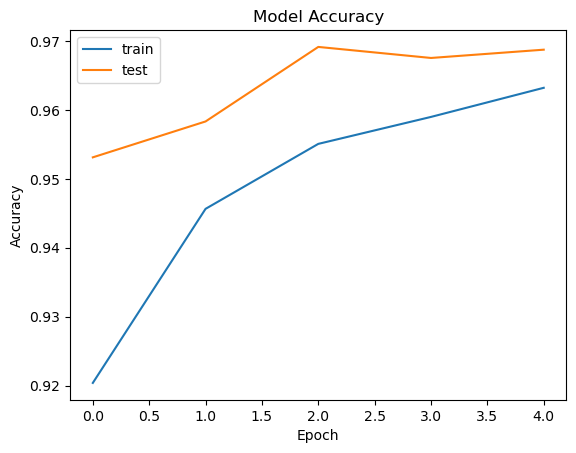

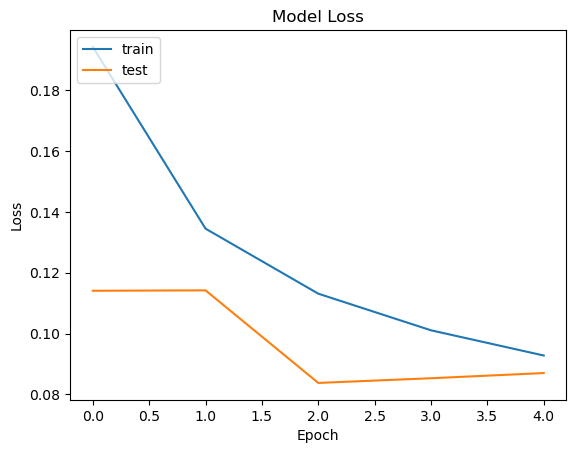

In [88]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
print("Train Accuracy:{:.3f}".format(history.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(history.history['val_accuracy'][-1]))

Train Accuracy:0.963
Test Accuracy:0.969
